In [ ]:
# !pip install pandas-datareader

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
plt.style.use('fivethirtyeight')
import datetime

from pandas_datareader import data as pdr
import yfinance as yf
# yf.pdr_override()

In [ ]:
import yfinance as yf

end_date = datetime.date.today().strftime('%Y-%m-%d')
apple = yf.Ticker("AAPL")
AAPL = apple.history(start = "2020-01-01", end= end_date)
AAPL.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02 00:00:00-05:00,71.721019,72.776598,71.466812,72.716072,135480400,0.0,0.0
2020-01-03 00:00:00-05:00,71.941336,72.771752,71.783969,72.009125,146322800,0.0,0.0
2020-01-06 00:00:00-05:00,71.127844,72.621623,70.876053,72.582886,118387200,0.0,0.0
2020-01-07 00:00:00-05:00,72.592586,72.849216,72.021223,72.241539,108872000,0.0,0.0
2020-01-08 00:00:00-05:00,71.943751,73.706271,71.943751,73.403641,132079200,0.0,0.0


## Get the Balance Sheet and Income Statements

In [ ]:
balance_sheet = apple.balance_sheet
print("Balance Sheet:")
print(balance_sheet.head())

income_statement = apple.financials
print("\nIncome Statement:")
print(income_statement.head())

# Information about Apple:
info = apple.info
print(f"\nCompany: {info['longName']}")
print(f"Sector: {info['sector']}")
print(f"Industry: {info['industry']}")
print(f"Market Cap: {info['marketCap']}")
print(f"P/E Ratio: {info['trailingPE']}")

# dividend data
dividends = apple.dividends
print("Dividends:")
print(dividends.tail())

Balance Sheet:
                            2024-09-30      2023-09-30      2022-09-30  \
Treasury Shares Number             NaN             0.0             NaN   
Ordinary Shares Number   15116786000.0   15550061000.0   15943425000.0   
Share Issued             15116786000.0   15550061000.0   15943425000.0   
Net Debt                 76686000000.0   81123000000.0   96423000000.0   
Total Debt              106629000000.0  111088000000.0  132480000000.0   

                            2021-09-30 2020-09-30  
Treasury Shares Number             NaN        NaN  
Ordinary Shares Number   16426786000.0        NaN  
Share Issued             16426786000.0        NaN  
Net Debt                 89779000000.0        NaN  
Total Debt              136522000000.0        NaN  

Income Statement:
                                                        2024-09-30  \
Tax Effect Of Unusual Items                                    0.0   
Tax Rate For Calcs                                           0.241   

In [ ]:
apple = yf.Ticker("AAPL")

tickers = ["SPY", "AAL", "ZM", "NFLX", "META", 'AAPL']

end_date = datetime.date.today().strftime('%Y-%m-%d')
apple = yf.Ticker("AAPL")
AAPL = apple.history(start = "2020-01-01", end= "2024-12-31")

for ticker in tickers:
    globals()[ticker] = yf.Ticker(ticker)
    globals()[ticker] = globals()[ticker].history(start = "2020-01-01", end= "2024-12-31")

In [ ]:
print(META.Close.mean())
META.describe()

299.9754144612436


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03,1257.000000,1257.0
mean,299.811910,304.029698,295.797743,299.975414,2.315541e+07,0.001591,0.0
std,124.745252,125.702635,123.419958,124.602584,1.572882e+07,0.028172,0.0
min,89.657437,90.035652,87.676781,88.492928,4.726100e+06,0.000000,0.0
25%,207.860358,210.607418,205.541291,208.795929,1.453120e+07,0.000000,0.0
50%,277.850522,283.891993,274.984004,279.512604,1.938320e+07,0.000000,0.0
75%,345.003967,350.448326,341.570169,344.665588,2.711680e+07,0.000000,0.0
max,630.430194,637.318496,626.147483,631.608154,2.323166e+08,0.500000,0.0


## Now, let us keep only the closing prices for our analysis.

In [ ]:
## keep only column close for all tickers
for ticker in tickers:
    globals()[ticker] = globals()[ticker].Close

SPY

,Close
Date,
2020-01-02 00:00:00-05:00,300.291504
2020-01-03 00:00:00-05:00,298.017700
2020-01-06 00:00:00-05:00,299.154663
2020-01-07 00:00:00-05:00,298.313507
2020-01-08 00:00:00-05:00,299.903351
...,...
2024-12-23 00:00:00-05:00,592.906433
2024-12-24 00:00:00-05:00,599.496582
2024-12-26 00:00:00-05:00,599.536499


In [ ]:
df = pd.DataFrame({'Market': SPY, 'AAPL':AAPL, 'AAL':AAL, 'NFLX':NFLX, 'META':META,'ZM':ZM})
df.tail()

,Market,AAPL,AAL,NFLX,META,ZM
Date,,,,,,
2024-12-23 00:00:00-05:00,592.906433,254.989655,17.250000,911.450012,599.316772,85.269997
2024-12-24 00:00:00-05:00,599.496582,257.916443,17.350000,932.119995,607.209778,85.669998
2024-12-26 00:00:00-05:00,599.536499,258.735504,17.350000,924.140015,602.813660,85.440002
2024-12-27 00:00:00-05:00,593.225464,255.309296,17.350000,907.549988,599.276855,83.820000
2024-12-30 00:00:00-05:00,586.455811,251.923019,17.620001,900.429993,590.714417,82.730003


In [ ]:
# print(AAPL)
# print(AAPL.shift(1))

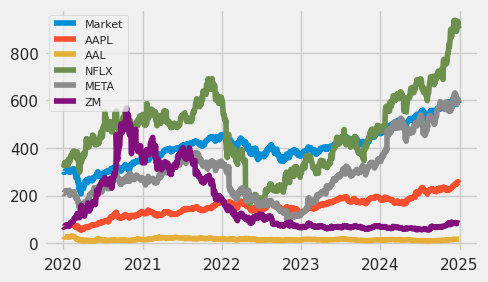

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(5, 3))
plt.plot(df, label=df.columns)
plt.legend(loc='upper left',fontsize=8)
plt.show()

## For financial analysis, we require the log returns (daily), rather than the raw stock prices. The formula for log returns is:

log(Today's Price/yesterday's price - 1)

In [ ]:
# create new columns that are log returns of the columns
data = np.log(df/df.shift(1))
# data = (df-df.shift(1))/df.shift(1)
# replace first row with zeroes
data.iloc[0] = 0
data.head(5)

,Market,AAPL,AAL,NFLX,META,ZM
Date,,,,,,
2020-01-02 00:00:00-05:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-03 00:00:00-05:00,-0.007601,-0.009770,-0.050769,-0.011926,-0.005305,-0.021177
2020-01-06 00:00:00-05:00,0.003808,0.007937,-0.012007,0.030014,0.018658,0.044193
2020-01-07 00:00:00-05:00,-0.002816,-0.004714,-0.003667,-0.015242,0.002161,0.022220
2020-01-08 00:00:00-05:00,0.005315,0.015958,0.022522,0.025404,0.010087,0.009000


## Find the betas of the stocks. The formula is shown below:

In [ ]:
beta_aapl = (data[['Market','AAPL']].cov()/data['Market'].var()).iloc[0].iloc[1]
beta_aapl

np.float64(1.189832372951634)

### Calculate beta using regression line.

In [ ]:
beta, alpha = np.polyfit(data['Market'], data['AAPL'], 1)
alpha
beta

np.float64(1.189832372951634)

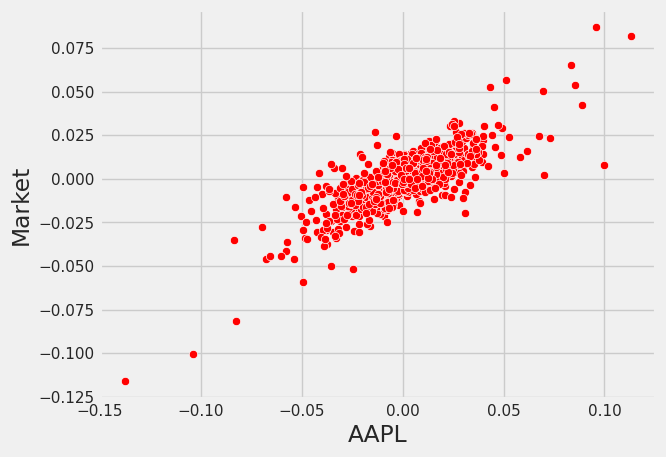

In [ ]:
# plt.axvline(0, color='grey', alpha = 0.5)
# plt.axhline(0, color='grey', alpha = 0.5)
sns.scatterplot(y = 'Market', x = 'AAPL', data = data, color = 'red')
plt.show()

<Axes: xlabel='Market', ylabel='AAPL'>

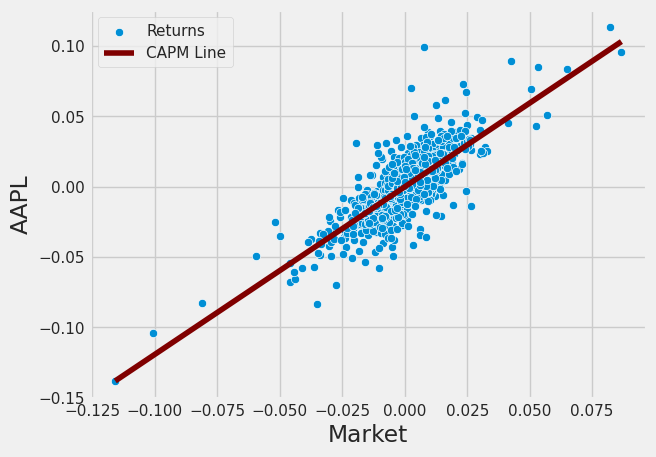

In [ ]:
sns.scatterplot(y = 'AAPL', x = 'Market', data = data, label = 'Returns')
sns.lineplot(x = data['Market'], y = alpha + (data['Market']-alpha)*beta_aapl, color = 'maroon', label = 'CAPM Line')

### Convert Daily Stock Market Returns to Annualized Returns (assuming 252 trading days in a year).

In [ ]:
rm = data['Market'].mean()*252
rm
cov = data[['Market','AAPL']].cov() *252
cov_aapl_market = cov.iloc[0,1]
cov_aapl_market
market_var = data['Market'].var()*252
market_var

AAPL_beta_annual = cov_aapl_market / market_var
print('The annualized beta will equal the one calculated at daily returns:',AAPL_beta_annual)

rf = 0.025
riskpremium = rm - rf

## CAPM
AAPL_capm_return = rf + AAPL_beta_annual*riskpremium

print(f"The annualized CAPM return of AAPL is {AAPL_capm_return*100:.2f}%")

The annualized beta will equal the one calculated at daily returns: 1.189832372951634
The annualized CAPM return of AAPL is 15.49%


In [ ]:
sharperatio = (rm-rf)/(data['AAPL'].std()*np.sqrt(252))
sharperatio
print(f"Sharpe Ratio: {round(sharperatio,4)}")

Sharpe Ratio: 0.345


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

# Tickers from the class exercise + 5 additional stocks
tickers = ["SPY", "AAL", "ZM", "NFLX", "META", "AAPL", "MSFT", "GOOG", "AMZN", "TSLA", "NVDA",
           "JPM", "BAC", "WMT", "KO", "PG"]  # Added JPM, BAC, WMT, KO, PG

rf = 0.025  # Risk-free rate

results = pd.DataFrame(columns=['Ticker', 'Cost of Equity (CAPM)', 'Sharpe Ratio'])

# Create an empty DataFrame to store the closing prices of all tickers
all_data = pd.DataFrame()

# Loop through each ticker to get its historical data and store it in the all_data DataFrame
for ticker in tickers:
    ticker_data = yf.Ticker(ticker).history(start="2020-01-01", end="2024-12-31")
    all_data[ticker] = ticker_data['Close']  # Store only the closing prices

# Calculate log returns for all tickers in the all_data DataFrame
data = np.log(all_data / all_data.shift(1))
data.iloc[0] = 0

# Now you can iterate through your tickers and calculate CAPM and Sharpe Ratio
for ticker in tickers:
    if ticker != 'SPY':  # Exclude 'SPY' as it represents the market
        rm = data['SPY'].mean() * 252  # Use 'SPY' to represent the market

        cov = data[['SPY', ticker]].cov() * 252  # Calculate covariance with the market ('SPY')
        cov_ticker_market = cov.iloc[0, 1]
        market_var = data['SPY'].var() * 252
        beta = cov_ticker_market / market_var

        cost_of_equity = rf + beta * (rm - rf)

        sharpe_ratio = (data[ticker].mean() * 252 - rf) / (data[ticker].std() * np.sqrt(252))

        results = pd.concat([results, pd.DataFrame({'Ticker': [ticker],
                                                       'Cost of Equity (CAPM)': [cost_of_equity],
                                                       'Sharpe Ratio': [sharpe_ratio]})], ignore_index=True)

print(results)

   Ticker  Cost of Equity (CAPM)  Sharpe Ratio
0     AAL               0.178739     -0.203617
1      ZM               0.093194      0.021537
2    NFLX               0.139427      0.376269
3    META               0.170125      0.404138
4    AAPL               0.154916      0.708029
5    MSFT               0.154667      0.586199
6    GOOG               0.149976      0.566076
7    AMZN               0.145427      0.402549
8    TSLA               0.202515      0.764137
9    NVDA               0.219531      1.128448
10    JPM               0.144303      0.338707
11    BAC               0.156788      0.117170
12    WMT               0.076142      0.689358
13     KO               0.093989      0.144604
14     PG               0.084943      0.289198


<ipython-input-18-c9e699da4abd>:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame({'Ticker': [ticker],


In [ ]:
#Find re = rf + (rm-rf) Bi + (Small-Big Size)Bi + (High M/B-Low M/B) Bi, Fama -French 3 Factor Model


In [ ]:
# prompt: take the stocks and put them into a fama french model

import statsmodels.api as sm

# Assuming 'data' DataFrame from the previous code is available
# and contains log returns of the market and stocks

# Function to calculate Fama-French factors
def fama_french(data, market_ticker='SPY'): # Changed market_ticker to 'SPY'
    # Use OLS regression to estimate the Fama-French model parameters
    # Assuming data contains columns 'Market', 'SMB', 'HML', and stock tickers.
    # Add your own SMB and HML factors

    # Drop rows with NaN values before regression
    data = data.dropna()

    X = data[[market_ticker, 'SMB', 'HML']]  # Replace 'SMB' and 'HML'
    X = sm.add_constant(X)  # Add a constant for intercept

    results = {}
    for ticker in data.columns:
        if ticker not in [market_ticker, 'SMB', 'HML', 'RF']:  # Exclude market and factors from regressions
            y = data[ticker]
            model = sm.OLS(y, X)
            results[ticker] = model.fit()

    return results

# Example usage:
# Assuming you have calculated SMB and HML factors and added them to the data DataFrame.

# Example SMB & HML calculations
# You need to replace this with your actual factor calculations
data['SMB'] = data['SPY'].rolling(window=60).std() # Example SMB factor calculation, Changed 'Market' to 'SPY'
data['HML'] = data['SPY'].rolling(window=120).mean() # Example HML factor calculation, Changed 'Market' to 'SPY'
data['RF'] = 0.03 #Example risk free rate

# Run the Fama-French model
fama_french_results = fama_french(data)

# Access results for a specific stock:
# Print the summary of the regression results for AAPL
print(fama_french_results['AAPL'].summary())

# Access the coefficients
print(fama_french_results['AAPL'].params)

#Further analysis and processing
# Iterate through the fama_french_results dictionary and store the results
# in a way that fits your needs.

                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     467.5
Date:                Tue, 08 Apr 2025   Prob (F-statistic):          1.19e-197
Time:                        21:20:54   Log-Likelihood:                 3423.4
No. Observations:                1138   AIC:                            -6839.
Df Residuals:                    1134   BIC:                            -6819.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.002      0.616      0.5